In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium


In [27]:
df_2022_s1 = pd.read_csv('data-2022/2022_S1_NB_FER.tsv', sep='\t')
df_2022_s2 = pd.read_csv('data-2022/2022_SS_NB_FER.csv', sep=';')

df_2022_s1['Semestre'] = 'S1'
df_2022_s2['Semestre'] = 'S2'

df = pd.concat([df_2022_s1, df_2022_s2])

In [28]:
# Trim all LIBELLE_ARRET values
df['LIBELLE_ARRET'] = df['LIBELLE_ARRET'].str.strip()

In [9]:
# print(df['CODE_STIF_TRNS'].unique())
# print(df['CODE_STIF_RES'].unique())
# print(df['LIBELLE_ARRET'].unique())

['PORTE MAILLOT',
 'ALESIA',
 'BOULOGNE-PONT DE SAINT CLOUD',
 'OLYMPIADES',
 'LES AGNETTES-ASNIERES-GENNEVILLIERS',
 'LES COURTILLES',
 'FUNICULAIRE   ',
 'BOURSE',
 'BREGUET-SABIN',
 'CRETEIL-P. LAC',
 'FR. POPULAIRE ',
 'ALEXANDRE DUMAS',
 'BROCHANT',
 'M. MONTROUGE  ',
 'ECOLE VETERINAIRE DE MAISONS-ALFORT',
 'BUTTES-CHAUMONT',
 'BUZENVAL',
 'CADET',
 'PONT CARDINET ',
 'MAIRIE ST-OUEN',
 'CLICHY ST-OUEN',
 'CAMBRONNE',
 'CAMPO-FORMIO',
 'CARDINAL-LEMOINE',
 'CARREFOUR PLEYEL',
 'CENSIER-DAUBENTON',
 'ALMA-MARCEAU',
 'CHAMPS-ELYSEES-CLEMENCEAU',
 'CHARDON-LAGACHE',
 'CHARENTON-ECOLES',
 'CHARLES DE GAULLE ETOILE',
 'CHARLES MICHELS',
 'CHARONNE',
 "CHATEAU D'EAU",
 'ANATOLE FRANCE',
 'CHATEAU DE VINCENNES',
 'CHATEAU-LANDON',
 'CHATEAU ROUGE',
 'CHATELET',
 "CHAUSSEE D'ANTIN (LA FAYETTE)",
 'CHEMIN VERT',
 'CHEVALERET',
 'CITE',
 'COLONEL FABIEN',
 'COMMERCE',
 'CONCORDE',
 'ABBESSES',
 'CONVENTION',
 'CORENTIN CARIOU',
 'ANVERS',
 'CORENTIN-CELTON',
 'CORVISART',
 'COURCELLES',
 '

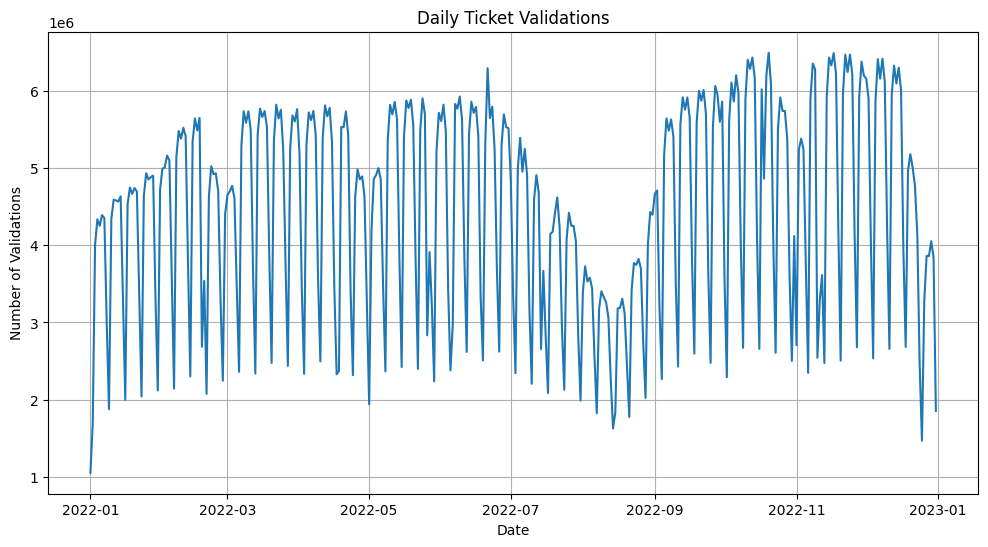

In [12]:
# Convert 'JOUR' to datetime
df['JOUR'] = pd.to_datetime(df['JOUR'], format='%d/%m/%Y')

# Group by date and sum the number of validations
daily_validations = df.groupby('JOUR')['NB_VALD'].sum().reset_index()
daily_validations['Month'] = daily_validations['JOUR'].dt.to_period('M')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(daily_validations['JOUR'], daily_validations['NB_VALD'])

# Set major and minor locators and formatters for the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add alternating background colors for each month
unique_months = daily_validations['Month'].unique()
for i, month in enumerate(unique_months):
    month_start = daily_validations[daily_validations['Month'] == month]['JOUR'].min()
    month_end = daily_validations[daily_validations['Month'] == month]['JOUR'].max()
    if i % 2 == 0:
        ax.axvspan(month_start, month_end, facecolor='lightgrey', alpha=0.5)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Number of Validations')
plt.title('Daily Ticket Validations')
plt.grid(True)
plt.show()

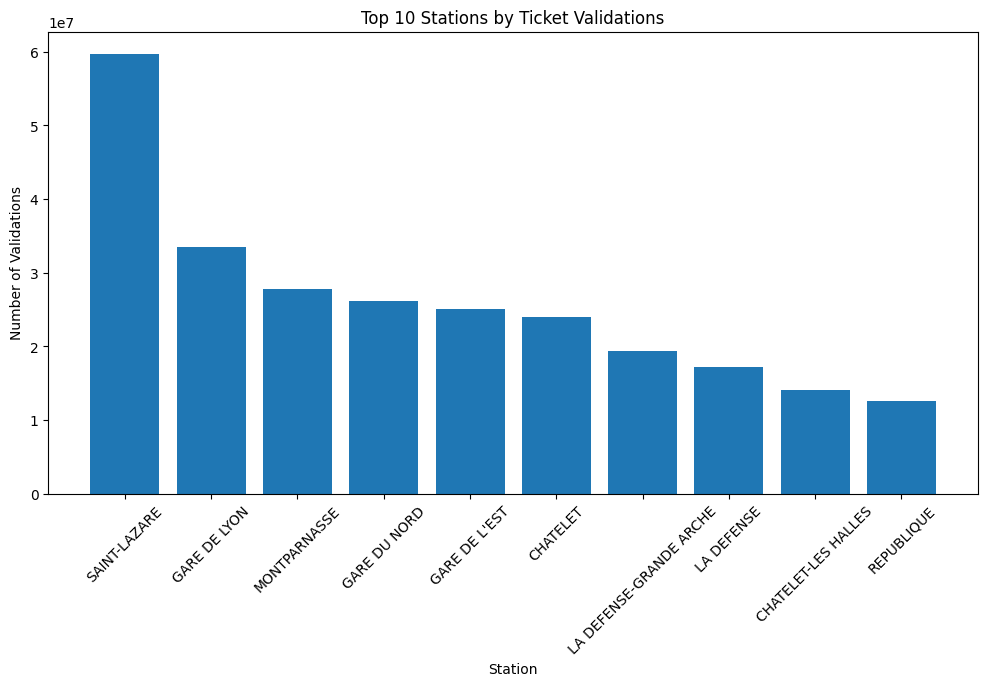

In [13]:
# Group by station name and sum the number of validations
station_validations = df.groupby('LIBELLE_ARRET')['NB_VALD'].sum().reset_index()

# Sort by number of validations and get top 10
top_stations = station_validations.sort_values(by='NB_VALD', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_stations['LIBELLE_ARRET'], top_stations['NB_VALD'])
plt.xlabel('Station')
plt.ylabel('Number of Validations')
plt.title('Top 10 Stations by Ticket Validations')
plt.xticks(rotation=45)
plt.show()


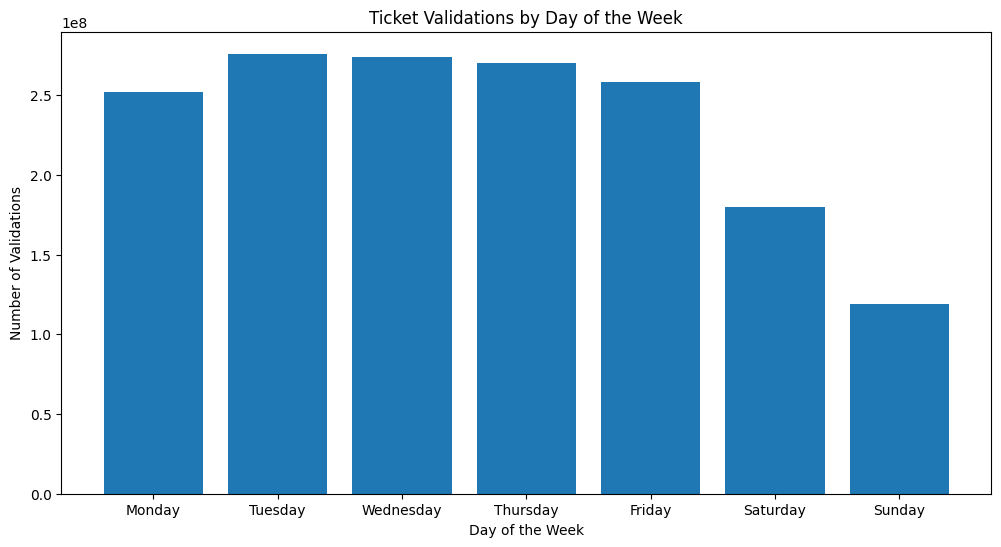

In [14]:
# Extract day of the week from the 'JOUR' column
df['DayOfWeek'] = df['JOUR'].dt.day_name()

# Group by day of the week and sum the number of validations
day_of_week_validations = df.groupby('DayOfWeek')['NB_VALD'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(day_of_week_validations['DayOfWeek'], day_of_week_validations['NB_VALD'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Validations')
plt.title('Ticket Validations by Day of the Week')
plt.show()


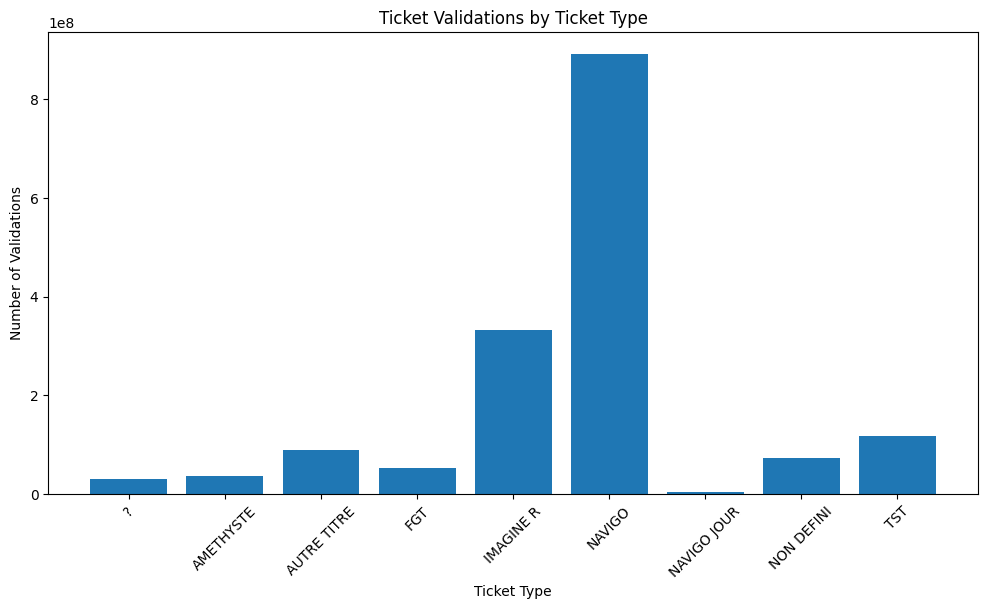

In [15]:
# Group by ticket type and sum the number of validations
ticket_type_validations = df.groupby('CATEGORIE_TITRE')['NB_VALD'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(ticket_type_validations['CATEGORIE_TITRE'], ticket_type_validations['NB_VALD'])
plt.xlabel('Ticket Type')
plt.ylabel('Number of Validations')
plt.title('Ticket Validations by Ticket Type')
plt.xticks(rotation=45)
plt.show()


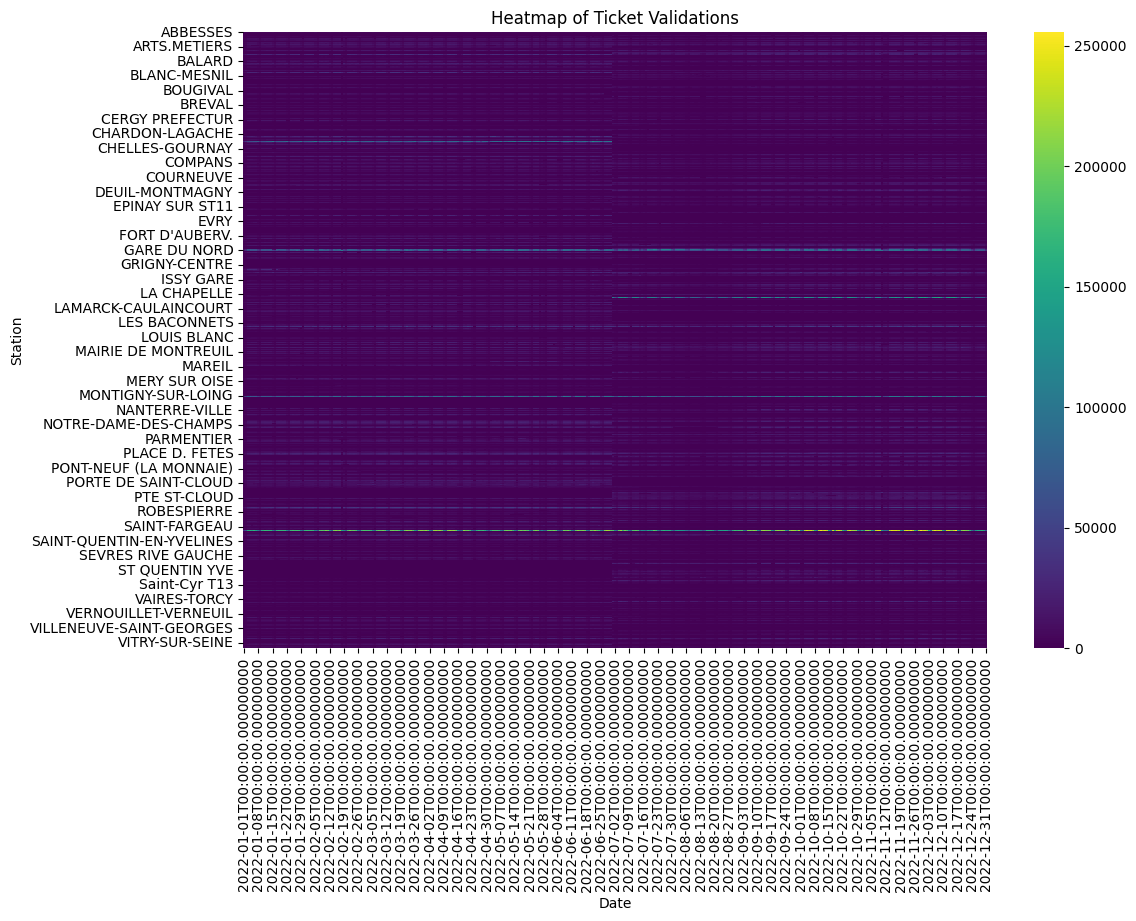

In [16]:
# Pivot the dataframe to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='LIBELLE_ARRET', columns='JOUR', values='NB_VALD', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Station')
plt.title('Heatmap of Ticket Validations')
plt.show()


In [29]:
df_geo = pd.read_csv('emplacement-des-gares-idf.csv', sep=';')

# Keep only the "Geo Point" and "id_ref_ZdC" columns
df_geo = df_geo[['Geo Point', 'id_ref_ZdC']]
df_geo['LATITUDE'] = df_geo['Geo Point'].str.split(',').str[0].astype(float)
df_geo['LONGITUDE'] = df_geo['Geo Point'].str.split(',').str[1].astype(float)
df_geo = df_geo.drop('Geo Point', axis=1)

In [30]:
# Join the df and df_geo by ID_REFA_LDA and id_ref_ZdC
df = df.merge(df_geo, left_on='ID_REFA_LDA', right_on='id_ref_ZdC')

In [ ]:
# Convert 'JOUR' to datetime
df['JOUR'] = pd.to_datetime(df['JOUR'], format='%d/%m/%Y')

# Group by station ID and date to sum the number of validations
station_validations = df.groupby(['CODE_STIF_ARRET', 'JOUR', 'LIBELLE_ARRET', 'LATITUDE', 'LONGITUDE'])['NB_VALD'].sum().reset_index()

# Create a map centered on Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Add circles to the map for each station and date
for _, row in station_validations.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=row['NB_VALD'] / 50,  # Adjust this value for better scaling
        popup=f"{row['LIBELLE_ARRET']} - {row['JOUR'].date()} - Validations: {row['NB_VALD']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(paris_map)

# Save the map to an HTML file
paris_map.save('paris_transport_validations_map.html')

# To display the map directly in a Jupyter notebook
paris_map
